In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
orig = pd.read_csv('mushrooms.csv')

In [5]:
orig.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#The 'class' column contains our labels.
#It tells us whether the mushroom is 'poisonous' or 'edible'.
X = orig.drop(['class'], axis=1)
y = orig['class']

In [7]:
for attr in X.columns:
    print('\n*', attr, '*')
    print(X[attr].value_counts())


* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
Name: stalk-shape, dtype: int64

* stalk-root *
b    3776


In [8]:
X.drop(['veil-type'], axis=1, inplace=True)

C:\Users\mjeha\AppData\Local\Temp/ipykernel_20268/1981877176.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mjeha\AppData\Local\Temp/ipykernel_20268/1981877176.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mjeha\AppData\Local\Temp/ipykernel_20268/1981877176.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mjeha\AppData\Local\Temp/ipykernel_20268/1981877176.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mjeha\AppData\Local\Temp/ipykernel_20268/1981877176.py:17: UserWarning: Matplotlib is currently using m

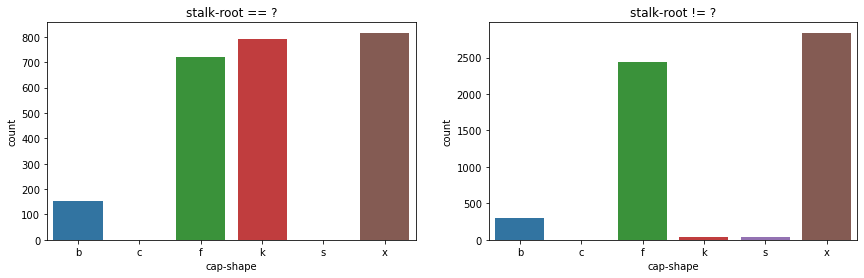

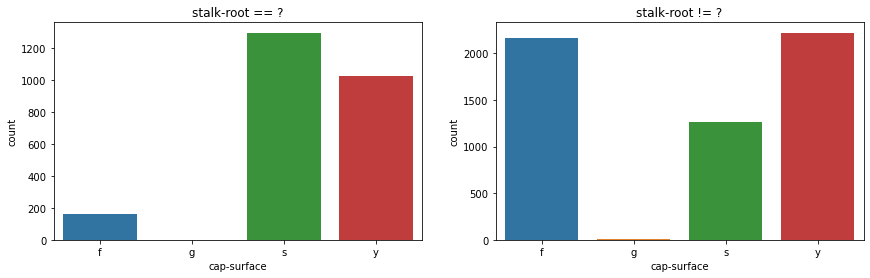

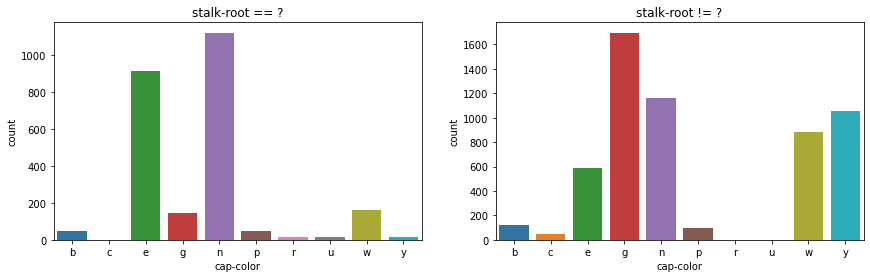

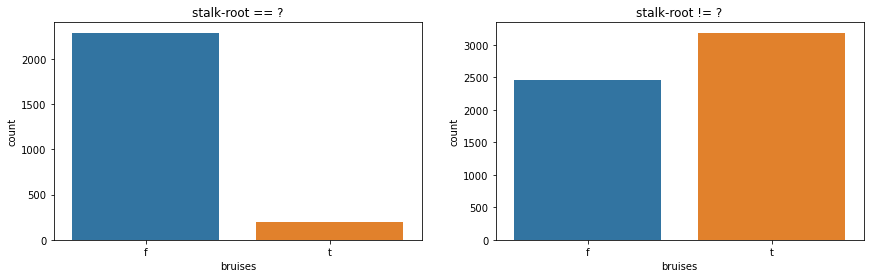

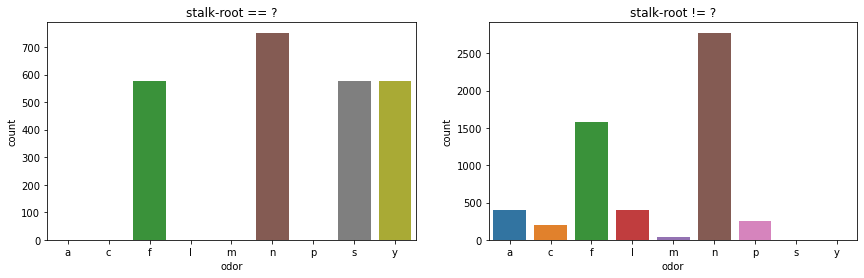

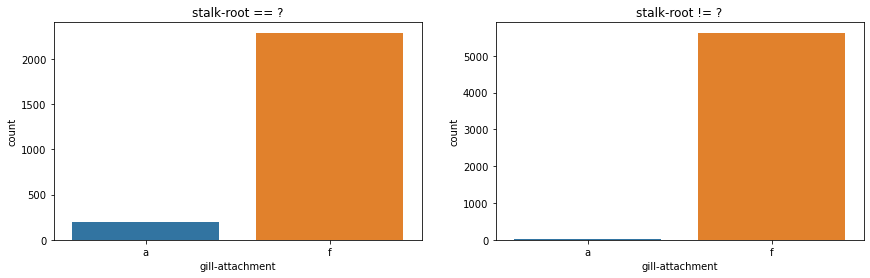

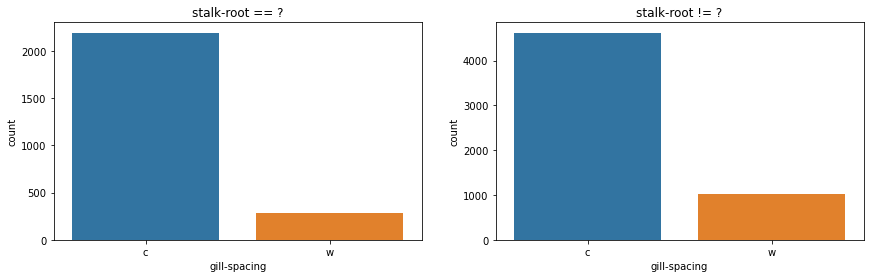

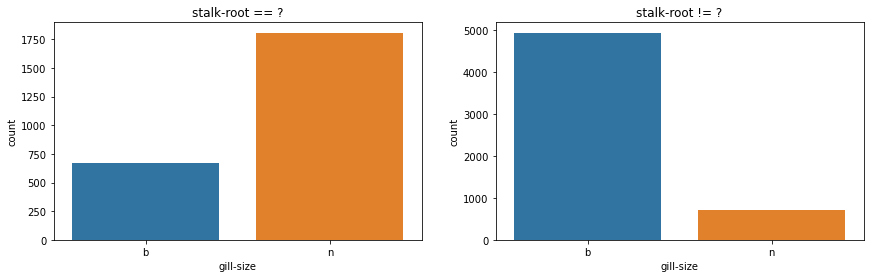

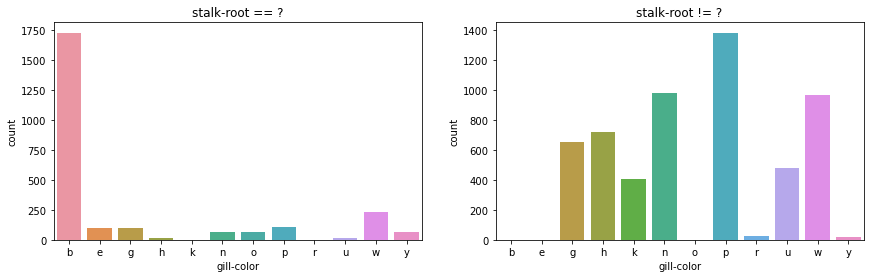

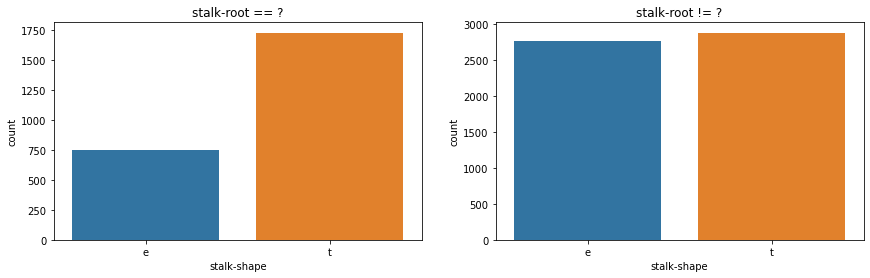

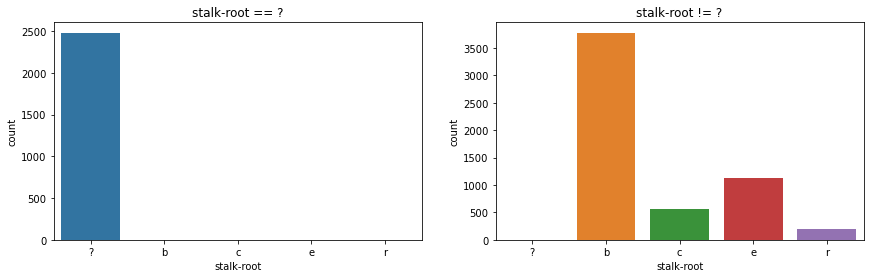

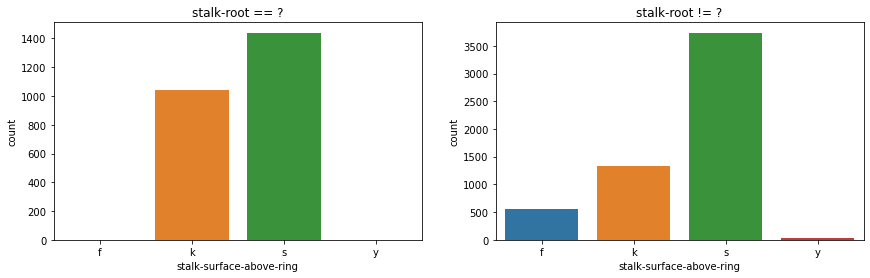

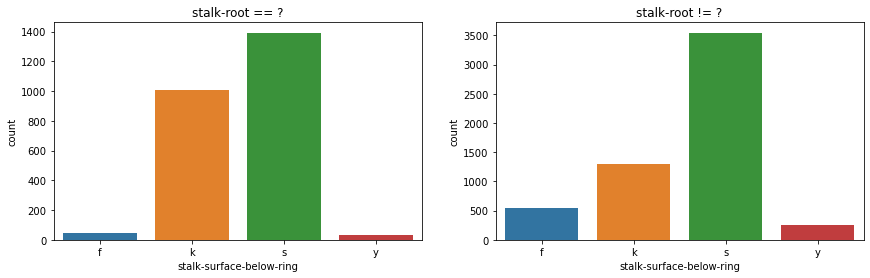

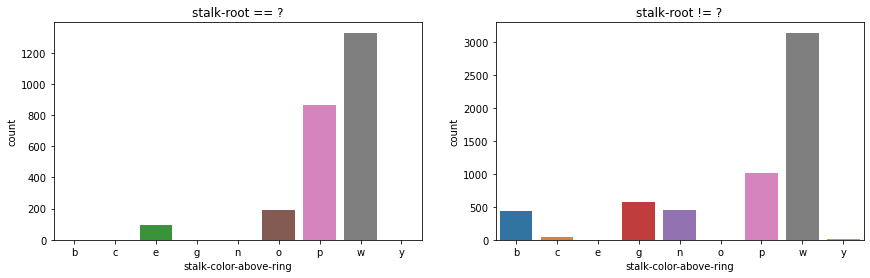

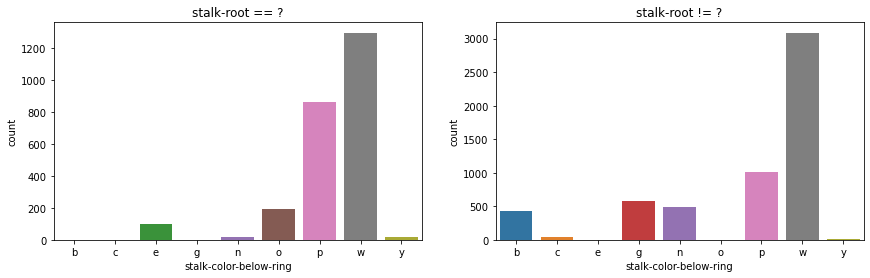

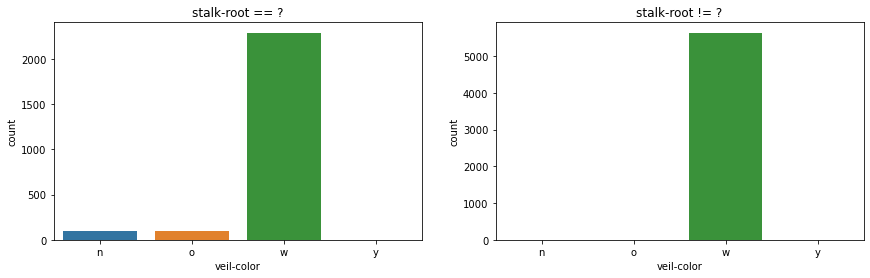

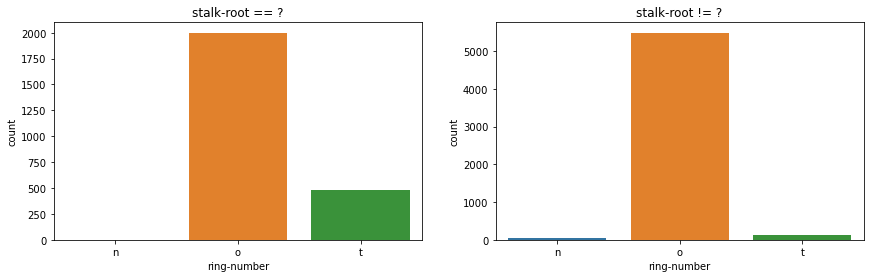

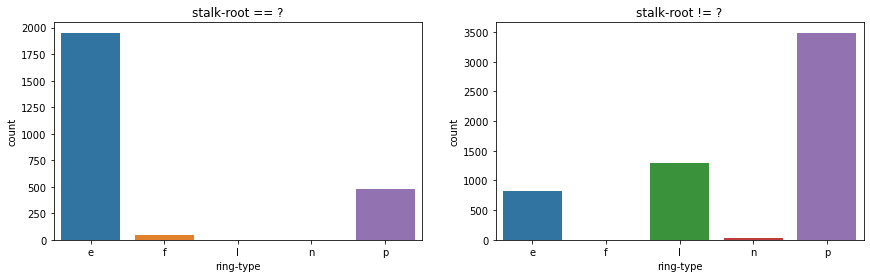

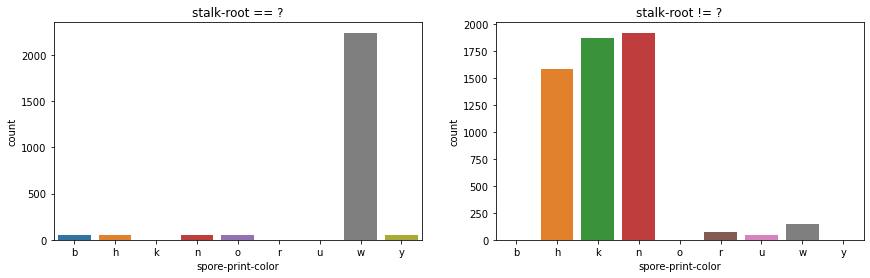

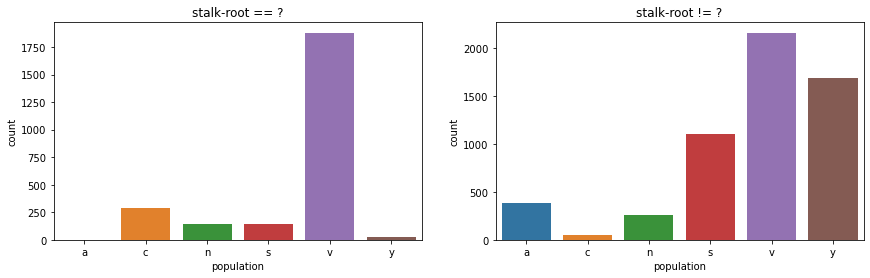

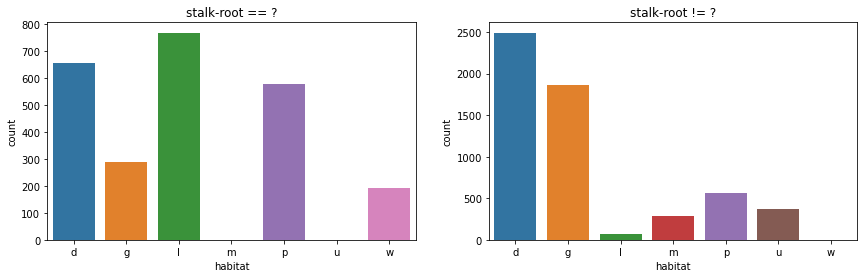

In [9]:
for attr in X.columns:
    #Format subplots
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(right=2)
    
    #Construct values to count in each column
    a=set(X[X['stalk-root']=='?'][attr])
    b=set(X[X['stalk-root']!='?'][attr])
    c = a.union(b)
    c = np.sort(np.array(list(c)))
    
    #Build each subplot
    sns.countplot(x=X[X['stalk-root']=='?'][attr], order=c, ax=ax[0]).set_title('stalk-root == ?')
    sns.countplot(x=X[X['stalk-root']!='?'][attr], order=c, ax=ax[1]).set_title('stalk-root != ?')
    
    #Plot the plots
    fig.show()

In [10]:
print( (len(X[X['stalk-root']=='?']) / len(X))*100, '%', sep='') 

30.526834071885773%


In [11]:
#For columns with only two values
for col in X.columns:
    if len(X[col].value_counts()) == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [12]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,1,0,1,k,0,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,1,a,1,0,0,k,0,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,1,l,1,0,0,n,0,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,1,p,1,0,1,n,0,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,0,n,1,1,0,k,1,...,s,s,w,w,w,o,e,n,a,g


In [13]:
X = pd.get_dummies(X)

In [14]:
X.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#Initialize the model
kmeans = KMeans(n_clusters=2)

In [16]:
#Fit our model on the X dataset
kmeans.fit(X)

KMeans(n_clusters=2)

In [17]:
#Calculate which mushrooms fall into which clusters
clusters = kmeans.predict(X)

In [18]:
#'cluster_df' will be used as a DataFrame
#to assist in the visualization
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['class'] = y

C:\Users\mjeha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


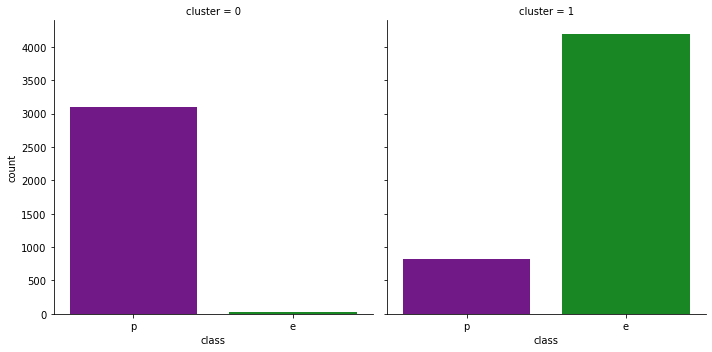

In [19]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count', order=['p','e'], palette=(["#7d069b","#069b15"]))

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [21]:
clusters = kmeans.predict(X)

In [22]:
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['class'] = y

C:\Users\mjeha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


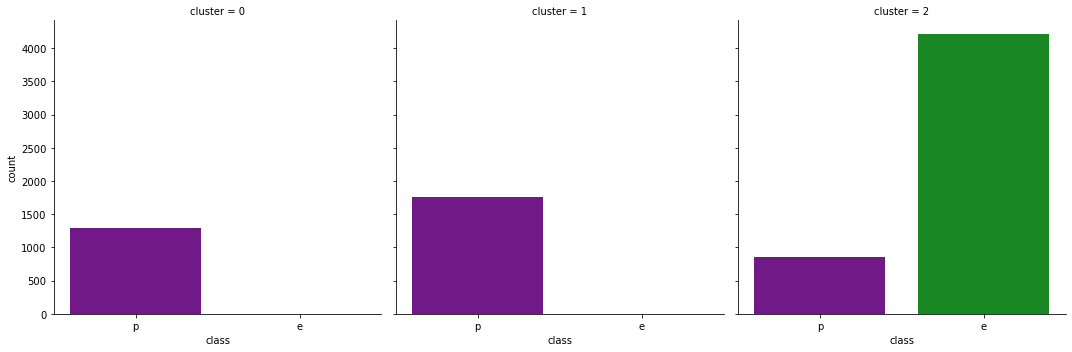

In [23]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count', order=['p','e'], palette=(["#7d069b","#069b15"]))

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [25]:
clusters = kmeans.predict(X)

In [26]:
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['class'] = y

C:\Users\mjeha\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


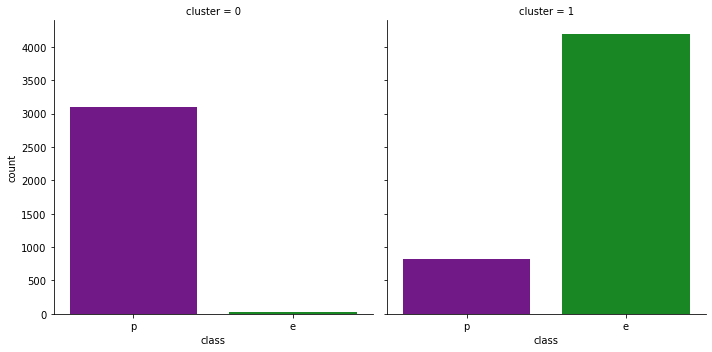

In [27]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count', order=['p','e'], palette=(["#7d069b","#069b15"]))

In [28]:
le = LabelEncoder()
y = le.fit_transform(y)

y

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
#Our training set will hold 80% of the data
#and the test set will hold 20% of the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)

In [30]:
#K-Means Clustering with two clusters
kmeans = KMeans(n_clusters=2)

#Logistic Regression with no special parameters
logreg = LogisticRegression()

In [31]:
kmeans.fit(train_X)#Note that kmeans is unlabeled...

logreg.fit(train_X, train_y)#... while logreg IS labeled

LogisticRegression()

In [32]:
kmeans_pred = kmeans.predict(test_X)

logreg_pred = logreg.predict(test_X)

In [33]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

In [34]:
if accuracy_score(kmeans_pred, test_y, normalize=False) < accuracy_score(kmeans_pred_2, test_y, normalize=False):
    kmeans_pred = kmeans_pred_2

In [35]:
#This DataFrame will allow us to visualize our results.
result_df = pd.DataFrame()

#The column containing the correct class for each mushroom in the test set, 'test_y'.
result_df['test_y'] = np.array(test_y) #(don't wanna make that mistake again!)

#The predictions made by K-Means on the test set, 'test_X'.
result_df['kmeans_pred'] = kmeans_pred
#The column below will tell us whether each prediction made by our K-Means model was correct.
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['test_y']

#The predictions made by Logistic Regression on the test set, 'test_X'.
result_df['logreg_pred'] = logreg_pred
#The column below will tell us whether each prediction made by our Logistic Regression model was correct.
result_df['logreg_correct'] = result_df['logreg_pred'] == result_df['test_y']

C:\Users\mjeha\AppData\Local\Temp/ipykernel_20268/2202980435.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


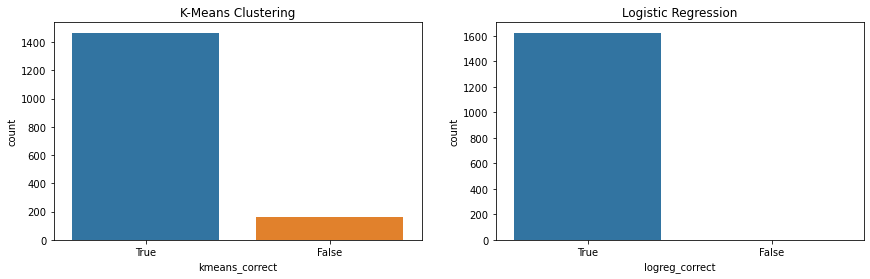

In [36]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(right=2)
sns.countplot(x=result_df['kmeans_correct'], order=[True,False], ax=ax[0]).set_title('K-Means Clustering')
sns.countplot(x=result_df['logreg_correct'], order=[True,False], ax=ax[1]).set_title('Logistic Regression')
fig.show()

In [37]:
from sklearn import metrics

In [38]:
cm = metrics.confusion_matrix(test_y, logreg_pred)
print(cm)

[[857   0]
 [  0 768]]


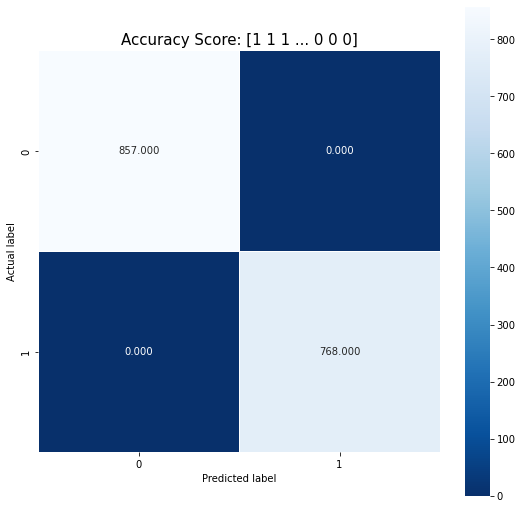

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logreg_pred)
plt.title(all_sample_title, size = 15);